# what is regression ?

I believe in KISS, keep it simple stupid!
so follow along to understand what is going on...

In [18]:
# importing what we need ...
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [19]:
# defining a simple function (e.g module in python world) to take 
# using asterisks to indicate we have some bunch of coordinates which we dont know the exact amount of it.
def plot_fn(f, *params):
    # indicating which type of plot we want to draw...
    plt.scatter(X, Y)
    # chunking the x coordinates in 100 chunks between min and max value of x values
    x = np.linspace(min(X), max(X), 100)
    # 
    y = [f(*params, x_) for x_ in x]
    # finally draw it !
    plt.plot(x, y, 'r')

In [3]:
# our sample data :
data = [
    (-0.8, 30.5), (3.8, 40.6), (7.6, 51.2), (10.8, 49.9), (15.8, 63.4),
    (15.9, 57.8), (20.4, 80.6), (24.1, 73.9), (25.5, 72.5), (32.5, 86.8),
    (35.0, 100.1), (36.6, 93.2), (40.2, 101.3), (44.1, 109.4), (48.0, 117.3),
    (52.7, 128.2), (55.0, 137.0), (58.6, 140.8), (61.2, 140.8), (66.5, 155.6),
    (68.2, 156.3), (71.3, 159.7), (76.6, 169.6), (79.0, 174.0), (84.5, 176.4),
    (83.7, 183.4), (90.5, 200.1), (92.9, 199.2), (97.6, 200.3), (100.3, 217.9)]
# seprating X and Y values
X, Y = list(zip(*data))
X = np.array(X)
Y = np.array(Y)


NameError: name 'np' is not defined

# Exploration

by drawing the values we can exactly see what is going on.
it is the best way to see variation of data in our dimentional space.

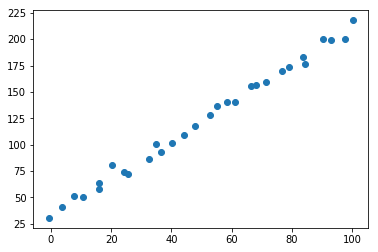

In [50]:
plt.scatter(X, Y)

# Defining the search space and the loss

Let's assume that there's a linear relationship between $x$ and $y$. Below, $a$ and $b$ are parameters.

and eventually we wanna achieve the mean squared error (MSE) of our supposed equation constructed by $a$ and $b$ constants.

In [51]:
def f(a, b, x):
    return a*x+b

Let's use mean squared error loss:

$$ l(a, b) = \frac{1}{n} \sum_{i = 1}^{n} \left( f(a, b, X_i) - Y_i \right)^2 $$

In [52]:
def loss(a, b):
    return 1/len(X) * np.sum((f(a, b, X) - Y)**2)

Obviously lower values of MSE means higher accuracy !

for example:

In [53]:
loss(1, 2)

5517.001

In [54]:
loss(2, 10)

211.6146666666666

Let's visualize what the loss surface looks like.

Eventually, we'll want to find an $a$ and $b$ that minimize the loss (in other words we finnaly can (in this case of course!) find best $a$ and $b$ coefficient values to relate data values to our suggested equation.

In [57]:
num_samples = 100
a_space = np.linspace(1, 3, num_samples)
b_space = np.linspace(-30, 100, num_samples)
losses = np.zeros((num_samples, num_samples))
for i in range(len(a_space)):
    for j in range(len(b_space)):
        losses[j, i] = loss(a_space[i], b_space[j])
# let's visualize log-loss since it looks nicer.
losses = np.log(losses)

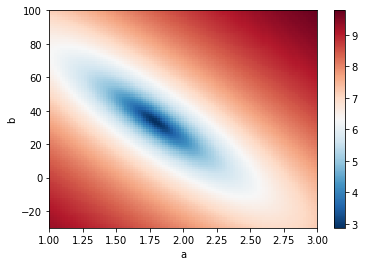

In [58]:
p = plt.pcolor(a_space, b_space, losses, cmap=cm.RdBu_r, vmin=losses.min(), vmax=losses.max())
plt.xlabel('a')
plt.ylabel('b')
plt.colorbar(p)

# Backpropagation

We need $\frac{\partial l}{\partial a}$ and $\frac{\partial l}{\partial b}$ in order to do gradient descent on our parameters. First, let's compute those via the chain rule.

In [62]:
def partial_a(a, b):
    return np.sum(X*2*(a*X+b-Y) / len(X))

In [63]:
def partial_b(a, b):
    return np.sum(2*(a*X+b-Y) / len(X))

In [64]:
%timeit partial_a(1, 2), partial_b(1, 2)

17.6 µs ± 704 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now, let's use backpropagation (dynamic programming) to speed this uph. Also, take note of the forward pass (computing outputs of the operations in the graph) and backward pass (computing derivatives of the operations in the graph).

The absolute speedup here is small because this computation is so fast, but when you have large and deep neural networks, and you're differentiating with respect to millions of parameters, this speedup is huge.

In [65]:
# returns a tuple (dl/da, dl/db)
def compute_grad(a, b):
    dl_dy = 2*(a*X+b-Y) / len(X)
    dl_db = np.sum(dl_dy)
    dl_da = np.sum(X * dl_dy)
    return dl_da, dl_db

In [66]:
%timeit compute_grad(1, 2)

11.1 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Even in this simple example, we see a speedup. The naive version is about 50% slower than the version using backpropagation.

# Gradient descent

In [68]:
# a reasonable initial guess will be cool
a_init = 2.0 
b_init = 3.0

# learning rate
alpha = 1e-4 

a = a_init
b = b_init

losses = []

for iteration in range(100000):
    # compute loss (for visualization)
    losses.append(loss(a, b))
    
    # compute gradients
    dl_da, dl_db = compute_grad(a, b)
    
    # update parameters
    a = a - alpha * dl_da
    b = b - alpha * dl_db

print('final loss=%f' % loss(a, b))

final loss=17.723258


Let's visualize how our loss changed over the iterations.

Text(0.5,0,'iteration')

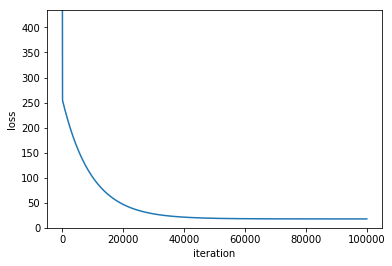

In [70]:
plt.plot(losses)
plt.ylim(0, np.max(losses))
plt.ylabel('loss')
plt.xlabel('iteration')

Let's visualize our learned function, along with our data points.

In [4]:
plot_fn(f, a, b)

NameError: name 'plot_fn' is not defined

What is our learned $f$?

In [72]:
print('f(x) = %.1fx + %.1f' % (a, b))

f(x) = 1.8x + 32.9


# Automatic differentiation

What we've been doing has been pretty mechanical, and it can be automated. TensorFlow is a library for writing computation graphs and automatically differentiating through them. so love Tensorflow!

## Setup

In [73]:
import tensorflow as tf
sess = tf.InteractiveSession()

## Defining parameters

$$\theta = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

In [74]:
theta = tf.Variable([a_init, b_init])
sess.run(tf.global_variables_initializer())

# Defining the function (search space) and the loss

In [75]:
x = tf.placeholder(tf.float32, [None])
y = tf.placeholder(tf.float32, [None])

In [76]:
f_tf = theta[0] * x + theta[1]

In [77]:
loss_tf = tf.reduce_sum((f_tf - y)**2) / len(X)

In [78]:
loss(a_init, b_init) # numpy version

434.02799999999996

In [79]:
loss_tf.eval({x: X, y: Y}) # from tensorflow

434.02805

## Automatically compute the gradient!

TensorFlow supports automatic differentiation, so this is all we need to do in order to compute the gradient:

In [80]:
d_theta, = tf.gradients(loss_tf, theta)

## Update step

In [81]:
next_theta = theta - alpha * d_theta

## Gradient descent

We're actually not going to use our `d_theta` or `next_theta`. We're going to use one of TensorFlow's built-in optimizers, which will even take the step of calling `tf.gradients` for us.

Let's use a fancier variation of gradient descent to optimize this: [Adam](https://arxiv.org/abs/1412.6980) (Kingma & Ba 2014). We can instantiate TensorFlow's Adam optimizer and tell it what quantity we want to minimize. It'll figure out the rest (including automatically computing the gradient).

In [82]:
optim = tf.train.AdamOptimizer(learning_rate=1e-2).minimize(loss_tf)

## Gradient descent

In [83]:
losses = []
sess.run(tf.global_variables_initializer()) # initialize theta (and also Adam internal state variables)
for i in range(5000):
    l, _ = sess.run([loss_tf, optim], {x: X, y: Y})
    losses.append(l)
    
print('final loss=%f' % loss_tf.eval({x: X, y: Y}))

final loss=17.867399


Visualizing the loss curve.

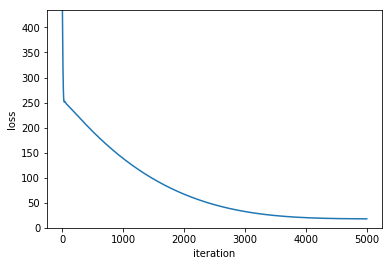

In [84]:
plt.plot(losses)
plt.ylim(0, np.max(losses))
plt.ylabel('loss')
plt.xlabel('iteration')
_

Let's look at the learned parameter.

In [85]:
theta.eval()

array([ 1.7983513, 32.257317 ], dtype=float32)

And the learned function.

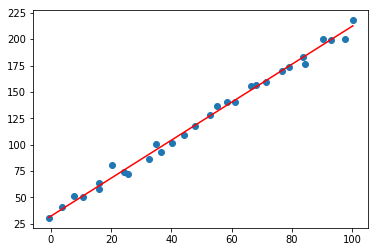

In [86]:
plot_fn(f, *theta.eval())